In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Data overview

In [3]:
data = np.load('../datasets/pneumoniamnist.npz')

In [4]:
print(data.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [5]:
x_train = data['train_images']
x_test = data['test_images']
x_val = data['val_images']

y_train = data['train_labels']
y_test = data['test_labels']
y_val = data['val_labels']

In [6]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (4708, 28, 28)
Shape of y_train: (4708, 1)
Shape of x_test: (624, 28, 28)
Shape of y_test: (624, 1)
Shape of x_val: (524, 28, 28)
Shape of y_val: (524, 1)


 The shapes indicate that the images have dimensions of 28x28 pixels, and there are a total of 4708 training samples, 624 test samples, and 524 validation samples.

In [7]:
img_size = 28

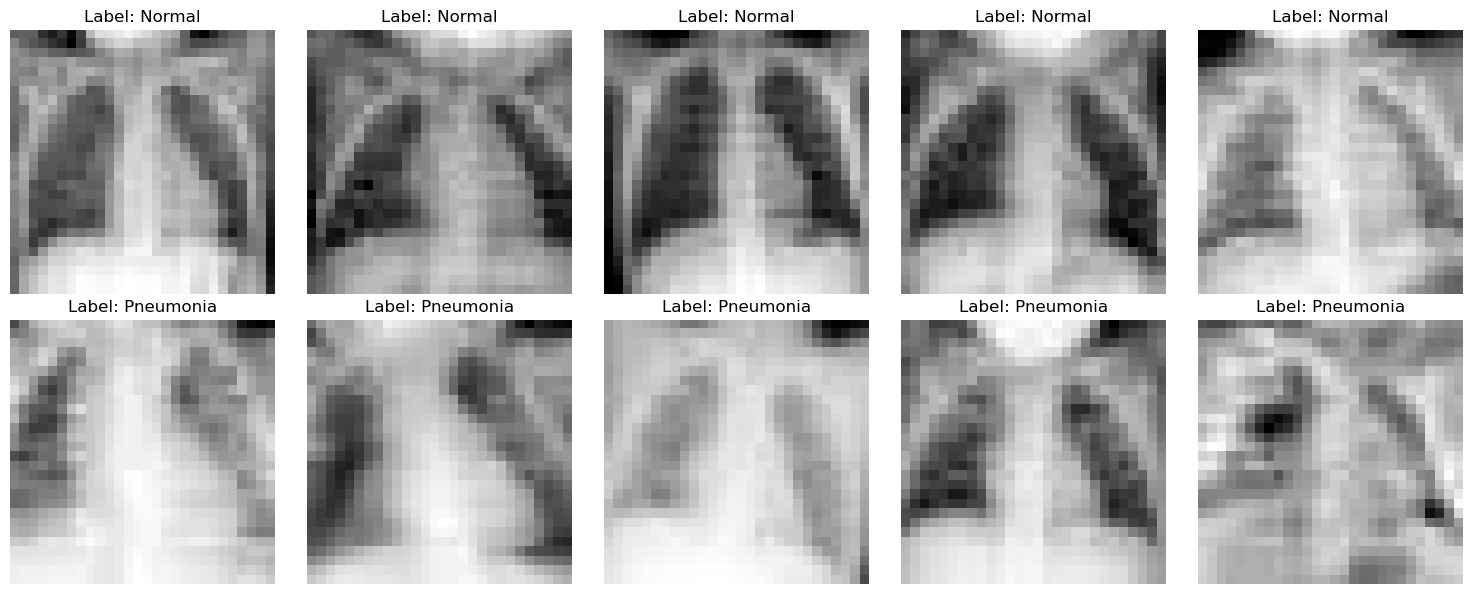

In [8]:
num_images_per_class = 5

# Find indices of "Normal" (label 0) and "Pneumonia" (label 1) images
normal_indices = [i for i, label in enumerate(y_train.flatten()) if label == 0]
pneumonia_indices = [i for i, label in enumerate(y_train.flatten()) if label == 1]

# Randomly select a few indices for each class
random_normal_indices = random.sample(normal_indices, num_images_per_class)
random_pneumonia_indices = random.sample(pneumonia_indices, num_images_per_class)

# Plot the images in a grid
fig, axes = plt.subplots(2, num_images_per_class, figsize=(15, 6))

# Display "Normal" images
for i, index in enumerate(random_normal_indices):
    axes[0, i].imshow(x_train[index], cmap='gray')
    axes[0, i].set_title(f"Label: Normal")
    axes[0, i].axis('off')

# Display "Pneumonia" images
for i, index in enumerate(random_pneumonia_indices):
    axes[1, i].imshow(x_train[index], cmap='gray')
    axes[1, i].set_title(f"Label: Pneumonia")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'pneumonia')

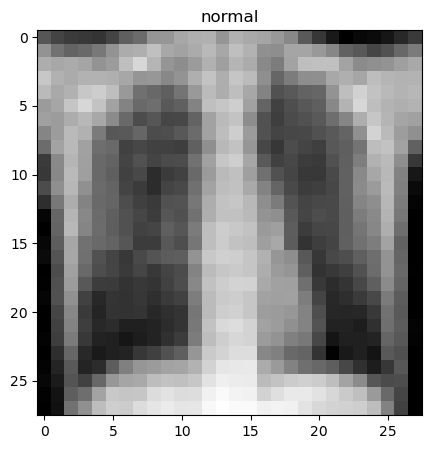

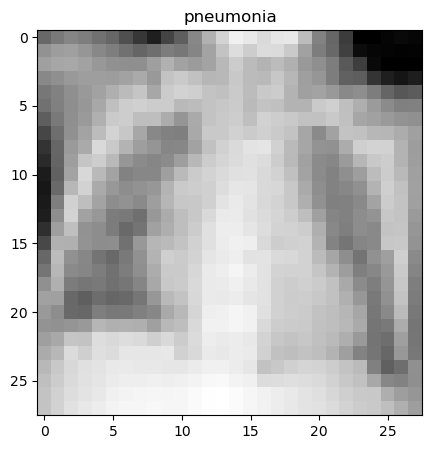

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(x_train[normal_indices[0]], cmap='gray')
plt.title('normal')

plt.figure(figsize = (5,5))
plt.imshow(x_train[pneumonia_indices[0]], cmap='gray')
plt.title('pneumonia')

d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Software\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\S

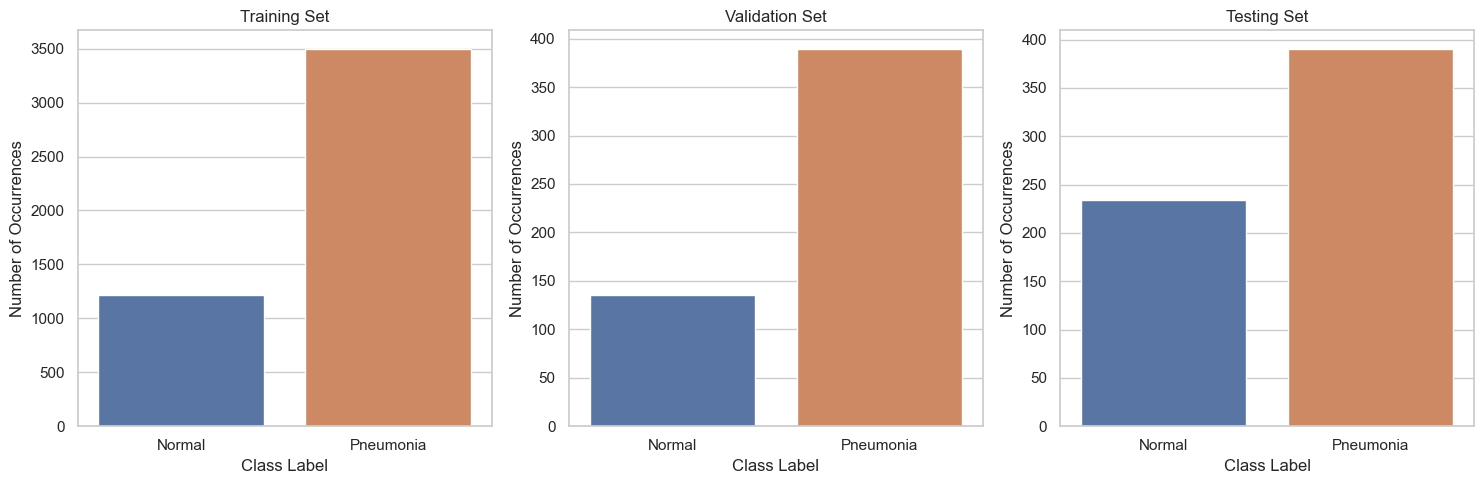

In [10]:
##Classes distribution in the training dataset.
# Replace numerical labels with class names
class_names = ["Normal", "Pneumonia"]

# Plot the bar chart
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Training set
sns.countplot(x=y_train.flatten(), ax=axes[0])
axes[0].set_title('Training Set')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Number of Occurrences')
axes[0].set_xticklabels(class_names)  # Replace x-axis labels with class names

# Validation set
sns.countplot(x=y_val.flatten(), ax=axes[1])
axes[1].set_title('Validation Set')
axes[1].set_xlabel('Class Label')
axes[1].set_ylabel('Number of Occurrences')
axes[1].set_xticklabels(class_names)  # Replace x-axis labels with class names

# Testing set
sns.countplot(x=y_test.flatten(), ax=axes[2])
axes[2].set_title('Testing Set')
axes[2].set_xlabel('Class Label')
axes[2].set_ylabel('Number of Occurrences')
axes[2].set_xticklabels(class_names)  # Replace x-axis labels with class names

plt.tight_layout()
plt.show()

## Data Preprocessing

Data normalization: reduce the effect of lightning, convert the data range from 0-255 to 0-1

Data augmentation if needed

In [11]:
# Data normalization #/255 may reduce the precision
x_train = ((np.array(x_train) / 255) - 0.5) * 2
x_val = ((np.array(x_val) / 255) - 0.5) * 2
x_test = ((np.array(x_test) / 255) - 0.5) * 2

# The images up until this point are represented by 2D arrays with dimensions of WIDTH x HEIGHT.
# In this final transformation the arrays are flattened into 1D arrays with dimensions of 1 x (WIDTH*HEIGHT).
x_train_flat = x_train.reshape(-1, img_size*img_size)
y_train = np.array(y_train)

x_val_flat = x_val.reshape(-1, img_size* img_size)
y_val = np.array(y_val)

x_test_flat = x_test.reshape(-1, img_size*img_size)
y_test = np.array(y_test)

Apply Gaussiam blur to the images: This helps to emphasize the features in the image.

In [12]:
# Apply Gaussian blur to the dataset.
import cv2
'''
alpha: Weight of the original image. Increasing alpha increases the contribution of the original image, making the result closer to the original.
beta: Weight of the blurred version. Increasing beta increases the contribution of the blurred version, making the result closer to the blurred image.
'''
# Function to apply Gaussian Blur to a single image
def apply_gaussian_blur_weighted(image, alpha=2, beta=-0.2):
    blurred_image = cv2.addWeighted(image, alpha, cv2.GaussianBlur(image, (0, 0), 2), beta, 0)
    return blurred_image

# Apply Gaussian Blur to the entire dataset
x_train_blurred = np.array([apply_gaussian_blur_weighted(img) for img in x_train])
x_val_blurred = np.array([apply_gaussian_blur_weighted(img) for img in x_val])
x_test_blurred = np.array([apply_gaussian_blur_weighted(img) for img in x_test])

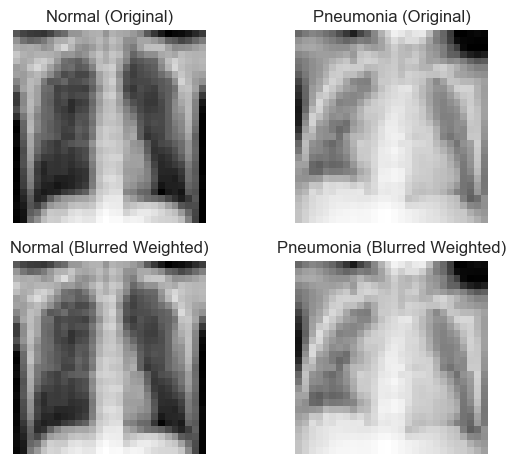

In [13]:
# Display a sample of original and blurred images for comparison
# Original images
plt.subplot(2, 2, 1)
plt.imshow(x_train[normal_indices[0]].reshape(img_size, img_size), cmap='gray')
plt.title('Normal (Original)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(x_train[pneumonia_indices[0]].reshape(img_size, img_size), cmap='gray')
plt.title('Pneumonia (Original)')
plt.axis('off')

# Weighted blurred images
plt.subplot(2, 2, 3)
plt.imshow(x_train_blurred[normal_indices[0]].reshape(img_size, img_size), cmap='gray')
plt.title('Normal (Blurred Weighted)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(x_train_blurred[pneumonia_indices[0]].reshape(img_size, img_size), cmap='gray')
plt.title('Pneumonia (Blurred Weighted)')
plt.axis('off')

plt.tight_layout()
plt.show()



## Model Training -SVM/ CNN

#### Training SVM Model

Classifier Training:
 _`GridSearchCV`_: Used for an exhaustive search over specified parameter values for an SVM classifier.

 _`SVM Classifier`_: Based on C-Support Vector Classification, implemented using libsvm. It handles multiclass support according to a one-vs-one scheme.

_`Parameter Exploration:`_

- gamma: Kernel coefficient for "rbf," "poly," and "sigmoid" types of kernels. Used with the argument "scale."
- kernel: Different types of kernels - "linear," "poly," "rbf," "sigmoid," and "precomputed."
For the "poly" kernel, different values for the degree of the polynomial kernel function were tested.
- class_weight: Tested as "balanced" and "none."
- n_splits: Determines the number of cross-validation splits.
_Validation Sets:_ Automatically created during training from the training images. The initial validation set was merged with the training set.

_`Best Combination:`_ Identified a specific combination of parameters and their values that gave the maximum precision for both classes.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def svm_classifier(training_set, training_labels):
    # Fitting the classifiers.
    param_grid = {
        'C': [1e0, 5e0, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4],
        'gamma': ['auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto']
    }

    # Creating the SVM classifier with GridSearchCV
    clf = GridSearchCV(SVC(kernel='poly'), param_grid, verbose=3)
    clf.fit(training_set, training_labels)

    # Printing the best parameters found by grid search
    print("Best parameters found by grid search:")
    print(clf.best_params_)

    # Printing the best estimator found by grid search
    print("\nBest estimator found by grid search:")
    print(clf.best_estimator_)

    return clf


In [22]:
def test_images(clf, test_images, test_labels):
    train_pred = clf.predict(test_images)
    print(classification_report(test_labels, train_pred))
    print(confusion_matrix(test_labels, train_pred))
    return train_pred

In [23]:
clf = svm_classifier(x_train_flat, y_train.ravel())

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .................C=1.0, gamma=auto;, score=0.743 total time=   3.1s
[CV 2/5] END .................C=1.0, gamma=auto;, score=0.742 total time=   3.1s
[CV 3/5] END .................C=1.0, gamma=auto;, score=0.742 total time=   3.1s
[CV 4/5] END .................C=1.0, gamma=auto;, score=0.743 total time=   3.1s
[CV 5/5] END .................C=1.0, gamma=auto;, score=0.742 total time=   3.1s
[CV 1/5] END .................C=1.0, gamma=auto;, score=0.743 total time=   3.1s
[CV 2/5] END .................C=1.0, gamma=auto;, score=0.742 total time=   3.1s
[CV 3/5] END .................C=1.0, gamma=auto;, score=0.742 total time=   3.1s
[CV 4/5] END .................C=1.0, gamma=auto;, score=0.743 total time=   3.0s
[CV 5/5] END .................C=1.0, gamma=auto;, score=0.742 total time=   3.0s
[CV 1/5] END .................C=1.0, gamma=auto;, score=0.743 total time=   3.0s
[CV 2/5] END .................C=1.0, gamma=auto

In [26]:
train_pred = test_images(clf, x_train_flat, y_train.ravel())
results_matrix_train = confusion_matrix(y_train.ravel(), train_pred)
train_pred = test_images(clf, x_test_flat, y_test.ravel())
results_matrix_test = confusion_matrix(y_test.ravel(), train_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00      3494

    accuracy                           1.00      4708
   macro avg       1.00      1.00      1.00      4708
weighted avg       1.00      1.00      1.00      4708

[[1214    0]
 [   1 3493]]
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       234
           1       0.81      0.99      0.89       390

    accuracy                           0.84       624
   macro avg       0.89      0.80      0.82       624
weighted avg       0.87      0.84      0.83       624

[[141  93]
 [  4 386]]


Show the heatmap based on the confusion matrix

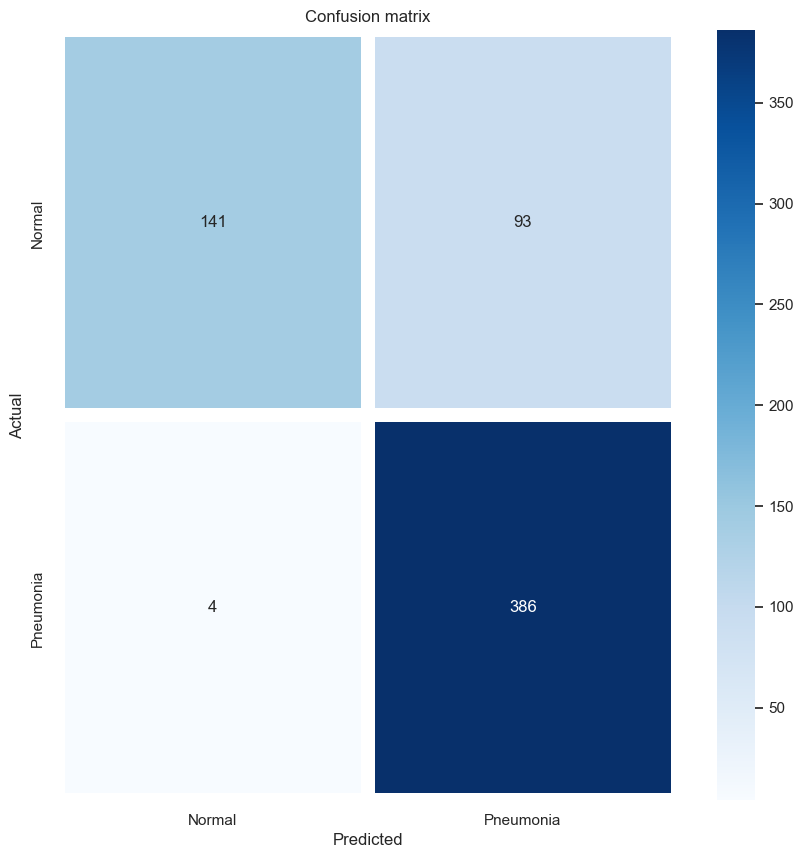

In [32]:
plt.figure(figsize = (10,10))
plt.title('Confusion matrix')
sns.heatmap(results_matrix_test, cmap='Blues', linewidth = 10 , annot = True, fmt='',xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()